In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import matplotlib as mpl
from TO_sim.get_rrrp import get_K_r_rp

In [2]:
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 16               # 본문 크기
mpl.rcParams['axes.labelsize'] = 18         # 축 라벨
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['mathtext.fontset'] = 'cm'      # LaTeX 수식은 Computer Modern 유지
mpl.rcParams['axes.linewidth'] = 1.0    

def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]


In [3]:
mcs_rp0 = np.load('Simul/mcs_rp0.npz',allow_pickle=True)
mcs_rpdh = np.load('Simul/mcs_rpdh.npz',allow_pickle=True)

ms_rp0=mcs_rp0['ms']
K_rp0u=mcs_rp0['K_u']
K_rp0d=mcs_rp0['K_d']

ms_rpdh=mcs_rpdh['ms']
K_rpdhu=mcs_rpdh['K_u']
K_rpdhd=mcs_rpdh['K_d']

F_rp0u = interpolate.interp1d(K_rp0u,ms_rp0)
F_rpdhu = interpolate.interp1d(K_rpdhu,ms_rpdh)

In [4]:
F_rp0u(7)

array(4.17448765)

In [5]:
np.min(ms_rp0),np.min(ms_rpdh)

(3.6479584000000003, 3.8645426)

In [32]:
DATA = np.load('Simul/RR_RP1000.npz',allow_pickle=True)
RP_us = DATA['RP']
RPl_us = DATA['RPl']
R_us = DATA['R']
R_0us = DATA['R0']
K_ = DATA['Ks']
m_ = DATA['ms']
RDH_us = (R_us - R_0us)/2


In [30]:
K_ = np.linspace(0,10,10001)
m = 3.864540
R_u,R_0u,RP1_u,RPl_u = get_K_r_rp(m,K_)
R_0p,R_00p,RP_0p,RPl_0p,m_0p = R_u,R_0u,RP1_u,RPl_u,m
R_0p_h = (R_0p - R_00p)/2

R_dh,R_0dh,RP_dh,RPl_dh,m_dh,K_dh = R_u,R_0u,RP1_u,RPl_u,m,K_
R_dh_h = (R_dh - R_0dh)/2

In [31]:
K7 = np.linspace(0,10,10001)
m7 = 4.41885
R_u7,R_0u7,RP1_u7,RPl_u7 = get_K_r_rp(m7,K7)
R_dh7 = (R_u7 - R_0u7)/2


In [11]:
plt.plot(K_,RPl_0p + R_0p_h)
plt.axhline(0,color='k',ls='--')

NameError: name 'RPl_0p' is not defined

In [ ]:
Kc_dh = np.nanmean(np.where(R_dh_h + RPl_dh > 0,K_,np.nan))

In [ ]:
np.where(RP_dh + R_dh_h> 0)

(array([3911, 3912, 3913, 3914], dtype=int64),)

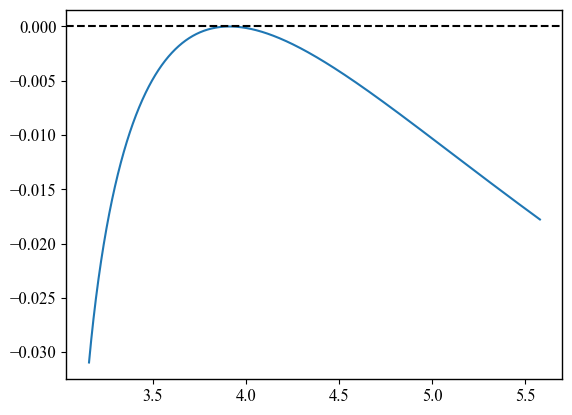

In [ ]:
plt.plot(K_dh,RP_dh + R_dh_h)
plt.axhline(0,color='k',ls='--')

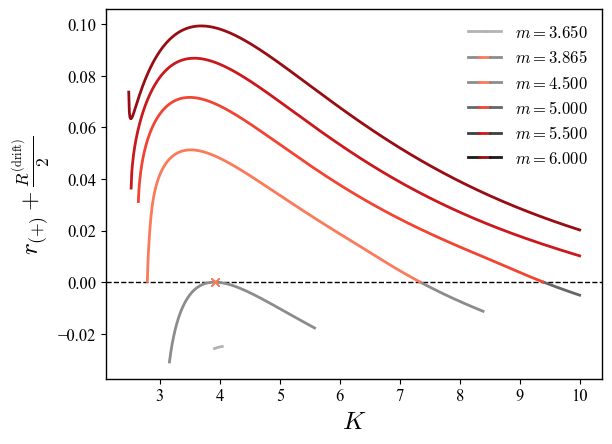

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

class JoinedTripleHandler(HandlerTuple):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # 중앙 위치
        y = height / 2.0
        n = len(orig_handle)
        seg_width = width / n   # 세 구간 균등 분할

        artists = []
        for i, handle in enumerate(orig_handle):
            x0 = xdescent + i * seg_width
            x1 = xdescent + (i + 1) * seg_width
            line = plt.Line2D(
                [x0, x1], [y, y],
                color=handle.get_color(),
                lw=handle.get_linewidth(),
                ls=handle.get_linestyle()
            )
            line.set_transform(trans)
            artists.append(line)

        return artists


# ---- 예시 (네 줄만 있어도 작동) ----
l = np.linspace(0.3, 0.9, 5)
cs = plt.cm.gray_r(l)
cs_r = plt.cm.Reds(l)

legends = []
m_list = []

A = RDH_us[365,:] + RP_us[365,:]
l1, = plt.plot(K_, np.where(A < 0, A, np.nan), c=cs[0], lw=2)
l2, = plt.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[0], lw=2)
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m_[365])

A = R_dh_h + RP_dh
l1, = plt.plot(K_dh, np.where(A <= 0, A, np.nan), c=cs[1], lw=2)
l2, = plt.plot(K_dh, np.where(A > 0, A, np.nan), c=cs_r[1], lw=2,marker='x')
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m_dh)



for i in range(len(l))[1:]:
    A = RDH_us[400+i*50,:] + RP_us[400+i*50,:]
    l1, = plt.plot(K_, np.where(A < 0, A, np.nan), c=cs[i], lw=2)
    l2, = plt.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[i], lw=2)
    if len(np.where(A > 0)[0]) > 0:
        legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
    else:
        legends.append((l1, l1))
    m_list.append(m_[400+i*50])

plt.legend(
    legends,
    [f"$m={m:.3f}$" for m in m_list],
    handler_map={tuple: JoinedTripleHandler()},
    loc=1,
    frameon=False
)
plt.ylabel(r'$r_{(+)}+\frac{R^{(\rm{drift})}}{2}$', fontsize=18)
plt.xlabel(r'$K$', fontsize=18)
plt.axhline(0, c='k', lw=1, zorder=-10, ls='--')
plt.show()


NameError: name 'R_dh_h' is not defined

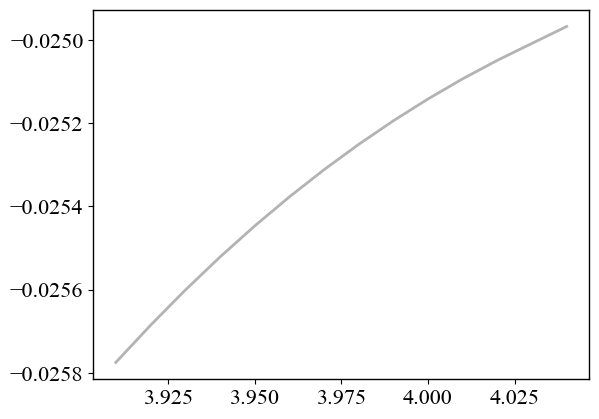

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

class JoinedTripleHandler(HandlerTuple):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # 중앙 위치
        y = height / 2.0
        n = len(orig_handle)
        seg_width = width / n   # 세 구간 균등 분할

        artists = []
        for i, handle in enumerate(orig_handle):
            x0 = xdescent + i * seg_width
            x1 = xdescent + (i + 1) * seg_width
            line = plt.Line2D(
                [x0, x1], [y, y],
                color=handle.get_color(),
                lw=handle.get_linewidth(),
                ls=handle.get_linestyle()
            )
            line.set_transform(trans)
            artists.append(line)

        return artists


# ---- 예시 (네 줄만 있어도 작동) ----
l = np.linspace(0.3, 0.9, 5)
cs = plt.cm.gray_r(l)
cs_r = plt.cm.Reds(l)

legends = []
m_list = []

A = RDH_us[365,:] + RP_us[365,:]
l1, = plt.plot(K_, np.where(A < 0, A, np.nan), c=cs[0], lw=2)
l2, = plt.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[0], lw=2)
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m_[365])

A = R_dh_h + RP_dh
l1, = plt.plot(K_dh, np.where(A <= 0, A, np.nan), c=cs[1], lw=2)
l2, = plt.plot(K_dh, np.where(A > 0, A, np.nan), c=cs_r[1], lw=2,marker='x')
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m_dh)



for i in range(len(l))[1:]:
    A = RDH_us[400+i*50,:] + RP_us[400+i*50,:]
    l1, = plt.plot(K_, np.where(A < 0, A, np.nan), c=cs[i], lw=2)
    l2, = plt.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[i], lw=2)
    if len(np.where(A > 0)[0]) > 0:
        legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
    else:
        legends.append((l1, l1))
    m_list.append(m_[400+i*50])

plt.legend(
    legends,
    [f"$m={m:.3f}$" for m in m_list],
    handler_map={tuple: JoinedTripleHandler()},
    loc=1,
    frameon=False
)
plt.ylabel(r'$r_{(+)}+\frac{R^{(\rm{drift})}}{2}$', fontsize=18)
plt.xlabel(r'$K$', fontsize=18)
plt.axhline(0, c='k', lw=1, zorder=-10, ls='--')
plt.show()


In [16]:
DATAC500 = np.load('RS_ensembles_closer96_500_K7.npz')
DATAC1000 = np.load('RS_ensembles_closer96_1000_K7.npz')
DATAC5000 = np.load('RS_ensembles_closer98_5000_K7.npz')
DATAC10000 = np.load('RS_ensembles_closer96_10000_K7.npz')

In [17]:
DATA500 = np.load('RS_ensembles96_500_K7.npz')
DATA1000 = np.load('RS_ensembles96_1000_K7.npz')
DATA5000 = np.load('RS_ensembles98_5000_K7.npz')
DATA10000 = np.load('RS_ensembles98_10000_K7.npz')


[ 1.42708333  1.46875     1.53125     1.52083333  1.42708333  1.48958333
  1.59375     1.59375     1.66666667  1.4375      1.53125     1.44791667
  1.57291667  1.8125      1.47916667  1.58333333  1.36458333  1.47916667
  1.55208333  1.59375     1.60416667  1.55208333  1.5625      1.66666667
  1.69791667  1.52083333  1.59375     1.5         1.42708333  1.80208333
  1.61458333  1.48958333  1.53125     1.48958333  1.69791667  1.625
  1.6875      1.63541667  1.69791667  1.77083333  1.875       1.71875
  1.67708333  1.51041667  1.8125      1.94791667  1.79166667  1.89583333
  1.75        1.89583333  1.80208333  2.17708333  1.92708333  2.46875
  2.0625      1.65625     2.25        2.35416667  2.19791667  1.90625
  2.32291667  2.5625      2.75        2.90625     3.61458333  3.9375
  3.95833333  3.36458333  5.1875      4.16666667  4.125       5.86458333
  6.15625     5.80208333  5.66666667  6.1875      5.78125     6.3125
  7.51041667  7.76041667  8.          7.39583333  8.83333333 10.63541667


(0.0, 0.04)

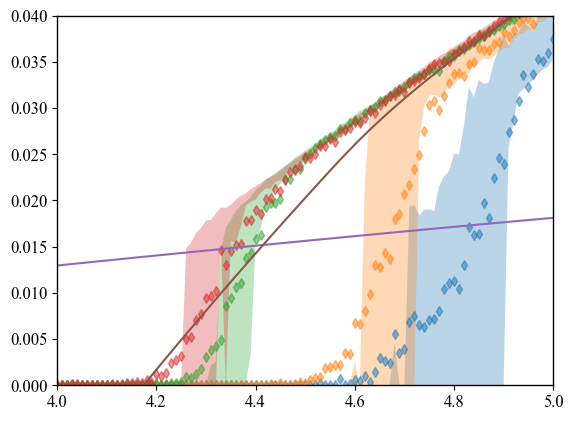

In [ ]:
for DATA,N in [(DATAC500,500),(DATAC1000,1000),(DATAC5000,5000),(DATAC10000,10000)]:
    RP = DATA['N_RPLs']
    NRP = DATA['N_Ps']
    print(np.mean(NRP ,axis=0))
    RP = np.where(NRP > 10, RP,0)
    RP_mean = np.nanmean(RP,axis=0)
    RP_std = np.nanstd(RP,axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    plt.plot(DATA['ms'],RP_mean,'d',alpha=0.5,markersize=5)
    plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.3)

plt.plot(m_,Rd[:,700])
plt.plot(m_,RPl_us[:,700])
plt.xlim(4,5)
plt.ylim(0,0.04)


In [ ]:
print(*DATA.keys())

N_R0s N_Rs N_RPs N_RMs N_RPLs N_RMLs N_0s N_Ps N_Ms N_rstd seeds_arr ms N K


(0.0, 102.9)

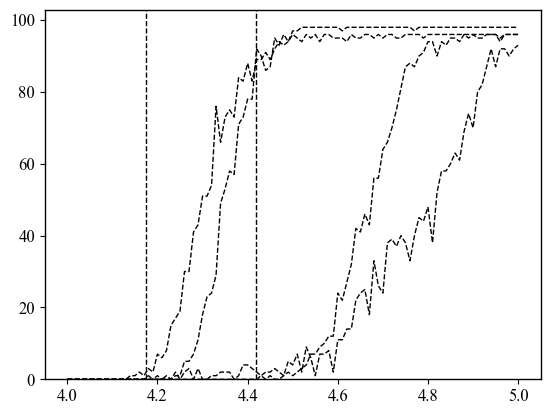

In [ ]:
ms = DATAC5000['ms']
NC = 0.01
plt.plot(ms,np.sum(DATAC10000['N_Ps']>10000*NC,axis=0),color='k',ls='--',lw=1)
plt.plot(ms,np.sum(DATAC5000['N_Ps']>5000*NC,axis=0),color='k',ls='--',lw=1)
plt.plot(ms,np.sum(DATAC1000['N_Ps']>1000*NC,axis=0),color='k',ls='--',lw=1)
plt.plot(ms,np.sum(DATAC500['N_Ps']>500*NC,axis=0),color='k',ls='--',lw=1)
plt.axvline(F_rp0u(7),color='k',ls='--',lw=1)
plt.axvline(F_rpdhu(7),color='k',ls='--',lw=1)
plt.ylim(0,)

Text(0, 0.5, '$r_{(+)}^{(\\rm{lock})}$')

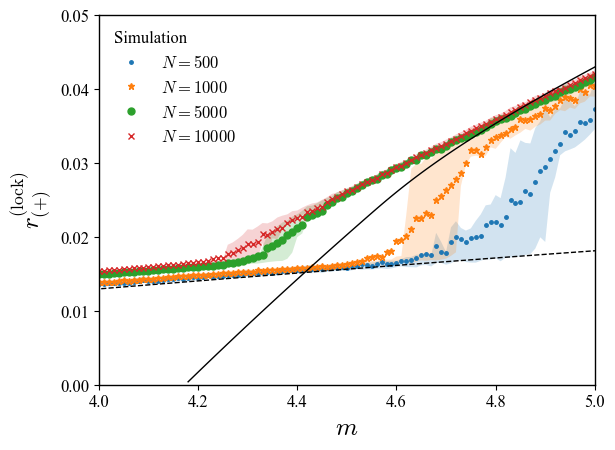

In [ ]:
ax = plt.gca()
for DATA,N,marker in [(DATAC500,500,'.'),(DATAC1000,1000,'*'),(DATAC5000,5000,'o'),(DATAC10000,10000,'x')]:
    RP = DATA['N_RPs']
    NRP = DATA['N_Ps']
    # RP = np.where(NRP > N*NC, RP,0)
    RP_mean = np.nanmean(RP,axis=0)
    RP_std = np.nanstd(RP,axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    # plt.plot(DATA['ms'],RP_mean,marker,alpha=1,markersize=5)
    l, = plt.plot(DATA['ms'],RP_mean,marker,alpha=1,markersize=5,label=rf'$N={N}$')
    f = plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.2)
    labels.append((l,f))
    # plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.2)
leg1 = ax.legend(loc='upper left', frameon=False, title='Simulation')
leg1._legend_box.align = "left"
plt.plot(m_,Rd[:,700],color='k',lw=1,ls='--')
plt.plot(m_,RPl_us[:,700],color='k',ls='-',lw=1)
plt.xlim(4,5)
# plt.xlim(0,10)
plt.ylim(0,0.05)
plt.xlabel(r'$m$',fontsize=18)
plt.ylabel(r'$r_{(+)}^{(\rm{lock})}$',fontsize=18)


Text(0, 0.5, '$r_{(+)}^{(\\rm{lock})}$')

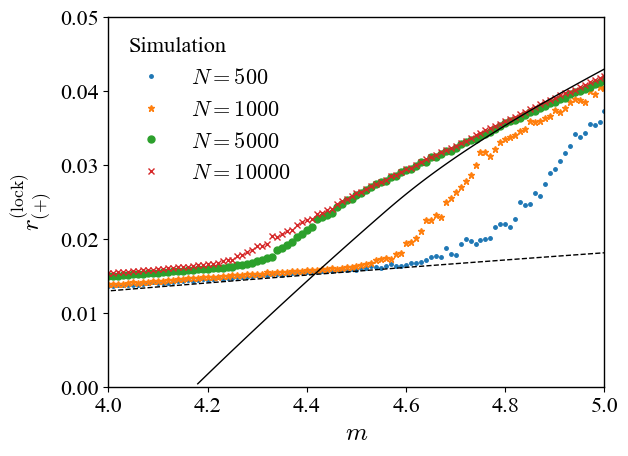

In [18]:
ax = plt.gca()
for DATA,N,marker in [(DATAC500,500,'.'),(DATAC1000,1000,'*'),(DATAC5000,5000,'o'),(DATAC10000,10000,'x')]:
    RP = DATA['N_RPs']
    NRP = DATA['N_Ps']
    # RP = np.where(NRP > N*NC, RP,0)
    RP_mean = np.nanmean(RP,axis=0)
    RP_std = np.nanstd(RP,axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    # plt.plot(DATA['ms'],RP_mean,marker,alpha=1,markersize=5)
    l, = plt.plot(DATA['ms'],RP_mean,marker,alpha=1,markersize=5,label=rf'$N={N}$')
    # f = plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.2)
    # labels.append(l)
    # plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.2)
leg1 = ax.legend(loc='upper left', frameon=False, title='Simulation')
leg1._legend_box.align = "left"
plt.plot(m_,Rd[:,700],color='k',lw=1,ls='--')
plt.plot(m_,RPl_us[:,700],color='k',ls='-',lw=1)
plt.xlim(4,5)
# plt.xlim(0,10)
plt.ylim(0,0.05)
plt.xlabel(r'$m$',fontsize=18)
plt.ylabel(r'$r_{(+)}^{(\rm{lock})}$',fontsize=18)


Text(0, 0.5, '$r_{(+)}$')

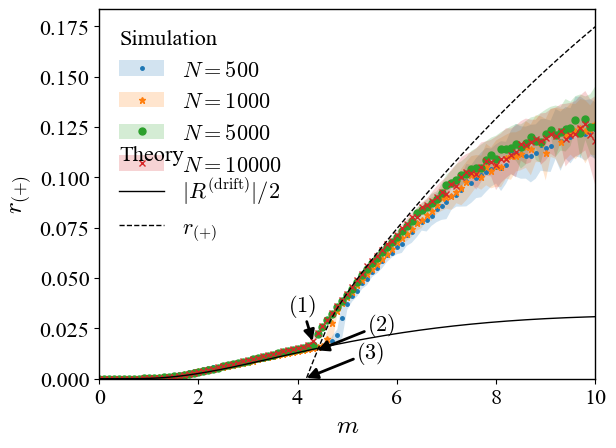

In [19]:
labels = []
for DATA,N,marker in [(DATA500,500,'.'),(DATA1000,1000,'*'),(DATA5000,5000,'o'),(DATA10000,10000,'x')]:
    RP = DATA['N_RPs']
    NRP = DATA['N_Ps']
    RP_mean = np.nanmean(RP,axis=0)
    RP_std = np.nanstd(RP,axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    l, = plt.plot(DATA['ms'],RP_mean,marker,alpha=1,markersize=5)
    f = plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.2)
    labels.append((l,f))
leg1 = plt.legend(labels, [r'$N=500$',r'$N=1000$',r'$N=5000$',r'$N=10000$'], loc='upper left', frameon=False,title='Simulation')
leg1._legend_box.align = "left" 
plt.plot(m_,Rd[:,700],color='k',lw=1,label=r'$|R^{(\rm{drift})}|/2$')
plt.plot(m_,RP_us[:,700],color='k',ls='--',lw=1,label=r'$r_{(+)}$')
leg2 = plt.legend(loc=6, frameon=False,title='Theory')
leg2._legend_box.align = "left" 
plt.gca().add_artist(leg1)
plt.xlim(4,5)
# plt.arrow(4.4,RP_us[440,700],-0.1,0.1,head_width=0.1,head_length=0.01,fc='k',ec='k')

x0 = 4.3
y0 = RP_mean[43]
plt.annotate(r'$(1)$',xy=(x0, y0),xytext=(x0 - 0.5, y0 + 0.015),
    arrowprops=dict(
        arrowstyle='-|>',             # 깔끔한 화살표 모양
        lw=2,
        color='k',
        shrinkA=0, shrinkB=0))

x0 = 4.4
y0 = RP_us[440,700]
plt.annotate(r'$(2)$',xy=(x0, y0),xytext=(x0 + 1, y0 + 0.01),
    arrowprops=dict(
        arrowstyle='-|>',             # 깔끔한 화살표 모양
        lw=2,
        color='k',
        shrinkA=0, shrinkB=0))
x0 = 4.18
y0 = RP_us[418,700]
plt.annotate(r'$(3)$',xy=(x0, y0),xytext=(x0 + 1, y0 + 0.01),
    arrowprops=dict(
        arrowstyle='-|>',             # 깔끔한 화살표 모양
        lw=2,
        color='k',
        shrinkA=0, shrinkB=0))


plt.xlim(0,10)
plt.ylim(0,)
plt.xlabel(r'$m$',fontsize=18)
plt.ylabel(r'$r_{(+)}$',fontsize=18)


Text(0, 0.5, '$r_{(+)}$')

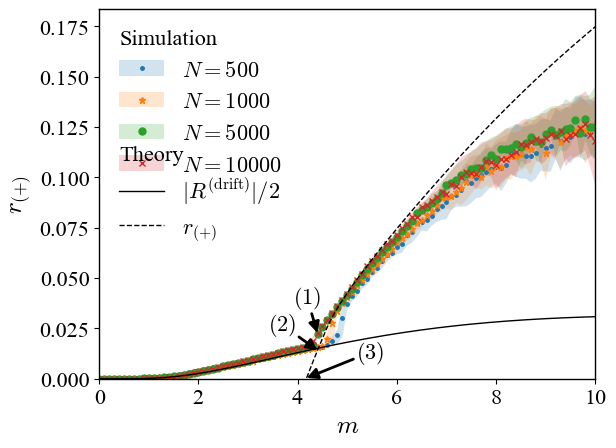

In [22]:
labels = []
for DATA,N,marker in [(DATA500,500,'.'),(DATA1000,1000,'*'),(DATA5000,5000,'o'),(DATA10000,10000,'x')]:
    RP = DATA['N_RPs']
    NRP = DATA['N_Ps']
    RP_mean = np.nanmean(RP,axis=0)
    RP_std = np.nanstd(RP,axis=0)
    RP_1Q = np.percentile(RP,25,axis=0)
    RP_3Q = np.percentile(RP,75,axis=0)
    Rd = (R_0us - R_us)/2
    l, = plt.plot(DATA['ms'],RP_mean,marker,alpha=1,markersize=5)
    f = plt.fill_between(DATA['ms'],RP_1Q,RP_3Q,alpha=0.2)
    labels.append((l,f))
leg1 = plt.legend(labels, [r'$N=500$',r'$N=1000$',r'$N=5000$',r'$N=10000$'], loc='upper left', frameon=False,title='Simulation')
leg1._legend_box.align = "left" 
plt.plot(m_,Rd[:,700],color='k',lw=1,label=r'$|R^{(\rm{drift})}|/2$')
plt.plot(m_,RP_us[:,700],color='k',ls='--',lw=1,label=r'$r_{(+)}$')
leg2 = plt.legend(loc=6, frameon=False,title='Theory')
leg2._legend_box.align = "left" 
plt.gca().add_artist(leg1)
# plt.xlim(4,5)
# plt.arrow(4.4,RP_us[440,700],-0.1,0.1,head_width=0.1,head_length=0.01,fc='k',ec='k')

x0 = 4.4
y0 = RP_mean[44]
plt.annotate(r'$(1)$',xy=(x0, y0),xytext=(x0 - 0.5, y0 + 0.015),
    arrowprops=dict(
        arrowstyle='-|>',             # 깔끔한 화살표 모양
        lw=2,
        color='k',
        shrinkA=0, shrinkB=0))

x0 = 4.4
y0 = RP_us[440,700]
plt.annotate(r'$(2)$',xy=(x0, y0),xytext=(x0 - 1, y0 + 0.01),
    arrowprops=dict(
        arrowstyle='-|>',             # 깔끔한 화살표 모양
        lw=2,
        color='k',
        shrinkA=0, shrinkB=0))
x0 = 4.18
y0 = RP_us[418,700]
plt.annotate(r'$(3)$',xy=(x0, y0),xytext=(x0 + 1, y0 + 0.01),
    arrowprops=dict(
        arrowstyle='-|>',             # 깔끔한 화살표 모양
        lw=2,
        color='k',
        shrinkA=0, shrinkB=0))


plt.xlim(0,10)
plt.ylim(0,)
plt.xlabel(r'$m$',fontsize=18)
plt.ylabel(r'$r_{(+)}$',fontsize=18)


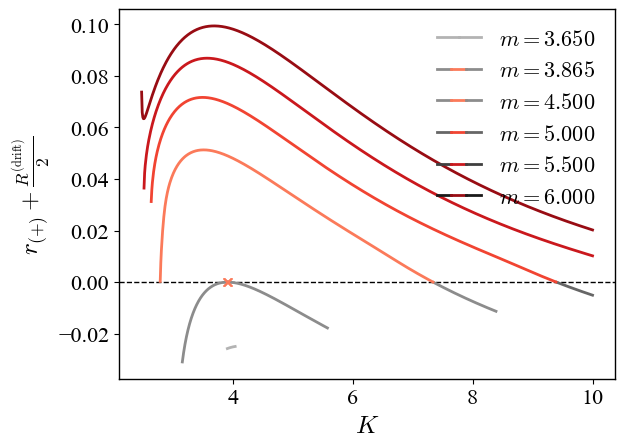

In [33]:
l = np.linspace(0.3, 0.9, 5)
cs = plt.cm.gray_r(l)
cs_r = plt.cm.Reds(l)

legends = []
m_list = []

A = RDH_us[365,:] + RP_us[365,:]
l1, = plt.plot(K_, np.where(A < 0, A, np.nan), c=cs[0], lw=2)
l2, = plt.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[0], lw=2)
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m_[365])

A = R_dh_h + RP_dh
l1, = plt.plot(K_dh, np.where(A <= 0, A, np.nan), c=cs[1], lw=2)
l2, = plt.plot(K_dh, np.where(A > 0, A, np.nan), c=cs_r[1], lw=2,marker='x')
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m_dh)



for i in range(len(l))[1:]:
    A = RDH_us[400+i*50,:] + RP_us[400+i*50,:]
    l1, = plt.plot(K_, np.where(A < 0, A, np.nan), c=cs[i], lw=2)
    l2, = plt.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[i], lw=2)
    if len(np.where(A > 0)[0]) > 0:
        legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
    else:
        legends.append((l1, l1))
    m_list.append(m_[400+i*50])

plt.legend(
    legends,
    [f"$m={m:.3f}$" for m in m_list],
    handler_map={tuple: JoinedTripleHandler()},
    loc=1,
    frameon=False
)
plt.ylabel(r'$r_{(+)}+\frac{R^{(\rm{drift})}}{2}$', fontsize=18)
plt.xlabel(r'$K$', fontsize=18)
plt.axhline(0, c='k', lw=1, zorder=-10, ls='--')

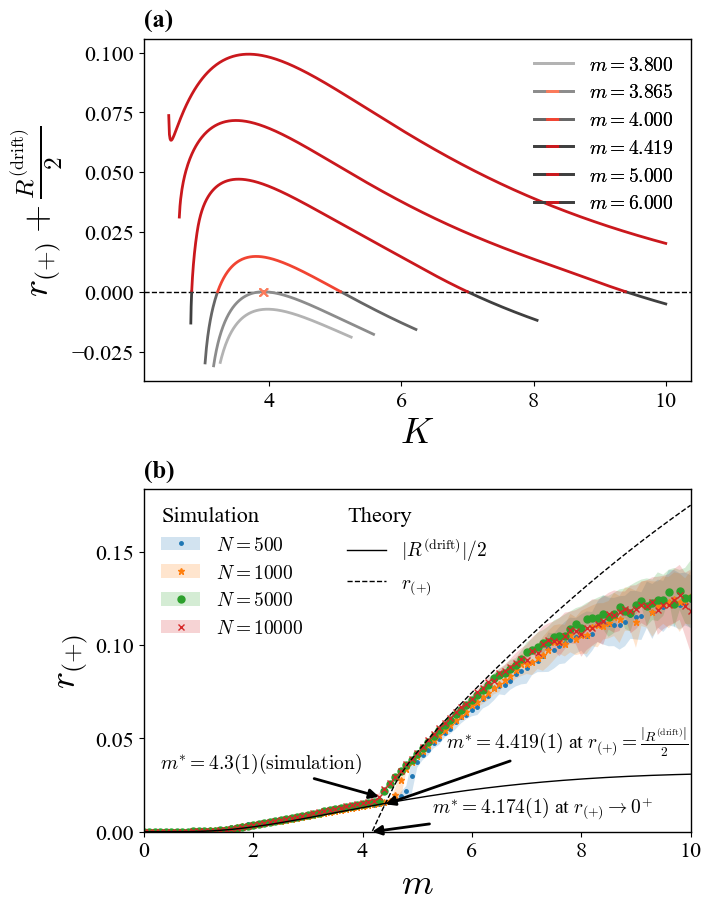

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

# --- 재사용 가능한 handler (위에서 쓰던 것) ---
class JoinedTripleHandler(HandlerTuple):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        y = height / 2.0
        n = len(orig_handle)
        seg_width = width / n
        artists = []
        for i, handle in enumerate(orig_handle):
            x0 = xdescent + i * seg_width
            x1 = xdescent + (i + 1) * seg_width
            line = plt.Line2D([x0, x1], [y, y],
                              color=handle.get_color(),
                              lw=handle.get_linewidth(),
                              ls=handle.get_linestyle())
            line.set_transform(trans)
            artists.append(line)
        return artists

# --- Figure + 2행 1열 서브플롯 (위: (a), 아래: (b)) ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 9), constrained_layout=True)

# -------------------- (a) 위쪽 패널 --------------------
lvals = np.linspace(0.3, 0.9, 5)
cs = plt.cm.gray_r(lvals)
cs_r = plt.cm.Reds(lvals)

legends = []
m_list = []




A = RDH_us[380,:] + RP_us[380,:]
l1, = ax1.plot(K_, np.where(A < 0, A, np.nan), c=cs[0], lw=2)
l2, = ax1.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[0], lw=2)
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m_[380])

A = R_dh_h + RP_dh
l1, = ax1.plot(K_dh, np.where(A <= 0, A, np.nan), c=cs[1], lw=2)
l2, = ax1.plot(K_dh, np.where(A > 0, A, np.nan), c=cs_r[1], lw=2,marker='x')
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m_dh)


A = RDH_us[400,:] + RP_us[400,:]
l1, = ax1.plot(K_, np.where(A < 0, A, np.nan), c=cs[2], lw=2)
l2, = ax1.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[2], lw=2)
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m_[400])


A = R_dh7 + RP1_u7
l1, = ax1.plot(K7, np.where(A < 0, A, np.nan), c=cs[3], lw=2)
l2, = ax1.plot(K7, np.where(A >= 0, A, np.nan), c=cs_r[3], lw=2)
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m7)

A = RDH_us[500,:] + RP_us[500,:]
l1, = ax1.plot(K_, np.where(A < 0, A, np.nan), c=cs[3], lw=2)
l2, = ax1.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[3], lw=2)
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m_[500])


A = RDH_us[600,:] + RP_us[600,:]
l1, = ax1.plot(K_, np.where(A < 0, A, np.nan), c=cs[3], lw=2)
l2, = ax1.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[3], lw=2)
if len(np.where(A > 0)[0]) > 0:
    legends.append((l1, l2, l1))   # 회색-빨강-회색으로 이어짐
else:
    legends.append((l1, l1))
m_list.append(m_[600])

# legend: handler_map으로 tuple을 JoinedTripleHandler로 처리
leg_a = ax1.legend(
    legends,
    [f"$m={m:.3f}$" for m in m_list],
    handler_map={tuple: JoinedTripleHandler()},
    loc=1,
    frameon=False,
    fontsize=14,
    ncol = 1
)
# 제목 왼쪽 정렬
leg_a._legend_box.align = "left"
ax1.add_artist(leg_a)  # 명시적으로 추가

ax1.set_ylabel(r'$r_{(+)}+\frac{R^{(\rm{drift})}}{2}$', fontsize=26)
ax1.set_xlabel(r'$K$', fontsize=26)
ax1.axhline(0, c='k', lw=1, zorder=-10, ls='--')

# (a) 라벨 텍스트 - 왼쪽 위에 붙여서 표시
ax1.text(0.0, 1.02, '(a)', transform=ax1.transAxes, fontsize=18, fontweight='bold',
         va='bottom', ha='left')

# -------------------- (b) 아래 패널 --------------------
labels = []
for DATA, N, marker in [(DATA500,500,'.'), (DATA1000,1000,'*'), (DATA5000,5000,'o'),(DATA10000,10000,'x')]:
    RP = DATA['N_RPs']
    RP_mean = np.nanmean(RP, axis=0)
    RP_1Q = np.percentile(RP, 25, axis=0)
    RP_3Q = np.percentile(RP, 75, axis=0)
    Rd = (R_0us - R_us) / 2

    l, = ax2.plot(DATA['ms'], RP_mean, marker, alpha=1, markersize=5)
    f = ax2.fill_between(DATA['ms'], RP_1Q, RP_3Q, alpha=0.2)
    labels.append((l, f))

# Simulation legend for ax2
leg1 = ax2.legend(labels, [r'$N=500$', r'$N=1000$', r'$N=5000$',r'$N=10000$'],
                  loc='upper left', frameon=False, title='Simulation',fontsize=14)
leg1._legend_box.align = "left"

# Theory curves
line1, = ax2.plot(m_, Rd[:,700], color='k', lw=1, label=r'$|R^{(\mathrm{drift})}|/2$')
line2, = ax2.plot(m_, RP_us[:,700], color='k', ls='--', lw=1, label=r'$r_{(+)}$')

# Theory legend for ax2
leg2 = ax2.legend([line1, line2],
                  [r'$|R^{(\mathrm{drift})}|/2$', r'$r_{(+)}$'],fontsize=14,
                  loc=9, frameon=False, title='Theory')
leg2._legend_box.align = "left"

# 동시에 두 legend를 표시
ax2.add_artist(leg1)

# 화살표/annotation들 (데이터 좌표 사용)
x0 = 4.3
y0 = np.nanmean(DATA10000['N_RPs'], axis=0)[43]   # RP_mean[44]에 대응
ax2.annotate(r'$m^{*} = 4.3(1) (\rm{simulation})$', xy=(x0, y0), xytext=(x0 - 4, y0 + 0.015),fontsize=14,
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0))

x1 = 4.41885
y1 = RP_us[441, 700] 
ax2.annotate(r'$m^{*} = 4.419(1)$ at $r_{(+)} = \frac{\left|R^{(\rm{drift})}\right|}{2}$', xy=(x1, y1), xytext=(x1 + 1.1, y1 + 0.03),fontsize=14,
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0), ha='left')

x0b = 4.17448
y0b = 0# RP_us[418, 700] 
ax2.annotate(r'$m^{*} = 4.174(1)$ at $r_{(+)} \rightarrow 0^{+}$', xy=(x0b, y0b), xytext=(x0b + 1.1, y0b + 0.01),fontsize=14,
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0))
# ax2.text(0.01,0.03,r'$K=7$',transform=ax2.transAxes,fontsize=18)
ax2.set_xlim(0, 10)
ax2.set_ylim(bottom=0)
ax2.set_xlabel(r'$m$', fontsize=26)
ax2.set_ylabel(r'$r_{(+)}$', fontsize=26)

# (b) 라벨
ax2.text(0.0, 1.02, '(b)', transform=ax2.transAxes, fontsize=18, fontweight='bold',
         va='bottom', ha='left')
plt.savefig('fig4 ver3.pdf', dpi=300)
plt.show()


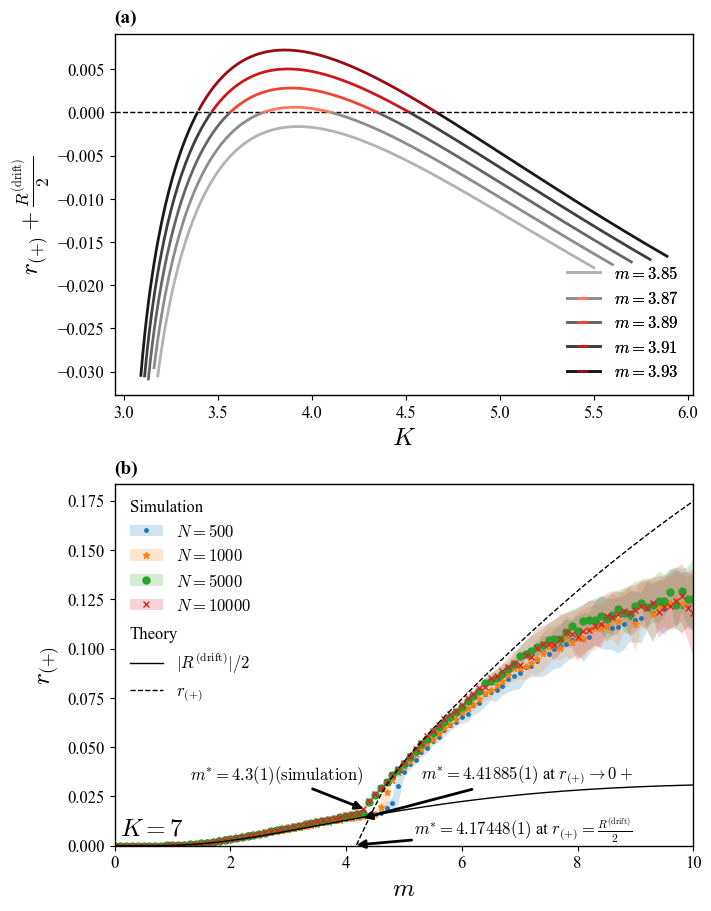

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

# --- 재사용 가능한 handler (위에서 쓰던 것) ---
class JoinedTripleHandler(HandlerTuple):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        y = height / 2.0
        n = len(orig_handle)
        seg_width = width / n
        artists = []
        for i, handle in enumerate(orig_handle):
            x0 = xdescent + i * seg_width
            x1 = xdescent + (i + 1) * seg_width
            line = plt.Line2D([x0, x1], [y, y],
                              color=handle.get_color(),
                              lw=handle.get_linewidth(),
                              ls=handle.get_linestyle())
            line.set_transform(trans)
            artists.append(line)
        return artists

# --- Figure + 2행 1열 서브플롯 (위: (a), 아래: (b)) ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 9), constrained_layout=True)

# -------------------- (a) 위쪽 패널 --------------------
lvals = np.linspace(0.3, 0.9, 5)
cs = plt.cm.gray_r(lvals)
cs_r = plt.cm.Reds(lvals)

leg_handles = []
m_list = []

for i in range(len(lvals)):
    A = RDH_us[385 + i*2, :] + RP_us[385 + i*2, :]
    # 두 구간을 각각 ax1에 그림
    h1, = ax1.plot(K_, np.where(A < 0, A, np.nan), c=cs[i], lw=2)
    h2, = ax1.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[i], lw=2)
    # A>0 구간이 있으면 triple, 없으면 double로 legend handle 구성
    if np.any(A > 0):
        leg_handles.append((h1, h2, h1))
    else:
        leg_handles.append((h1, h1))
    m_list.append(m_[385 + i*2])

# legend: handler_map으로 tuple을 JoinedTripleHandler로 처리
leg_a = ax1.legend(
    leg_handles,
    [f"$m={m:.2f}$" for m in m_list],
    handler_map={tuple: JoinedTripleHandler()},
    loc='lower right',
    frameon=False,
)
# 제목 왼쪽 정렬
leg_a._legend_box.align = "left"
ax1.add_artist(leg_a)  # 명시적으로 추가

ax1.set_ylabel(r'$r_{(+)}+\frac{R^{(\rm{drift})}}{2}$', fontsize=18)
ax1.set_xlabel(r'$K$', fontsize=18)
ax1.axhline(0, c='k', lw=1, zorder=-10, ls='--')

# (a) 라벨 텍스트 - 왼쪽 위에 붙여서 표시
ax1.text(0.0, 1.02, '(a)', transform=ax1.transAxes, fontsize=14, fontweight='bold',
         va='bottom', ha='left')

# -------------------- (b) 아래 패널 --------------------
labels = []
for DATA, N, marker in [(DATA500,500,'.'), (DATA1000,1000,'*'), (DATA5000,5000,'o'),(DATA10000,10000,'x')]:
    RP = DATA['N_RPs']
    RP_mean = np.nanmean(RP, axis=0)
    RP_1Q = np.percentile(RP, 25, axis=0)
    RP_3Q = np.percentile(RP, 75, axis=0)
    Rd = (R_0us - R_us) / 2

    l, = ax2.plot(DATA['ms'], RP_mean, marker, alpha=1, markersize=5)
    f = ax2.fill_between(DATA['ms'], RP_1Q, RP_3Q, alpha=0.2)
    labels.append((l, f))

# Simulation legend for ax2
leg1 = ax2.legend(labels, [r'$N=500$', r'$N=1000$', r'$N=5000$',r'$N=10000$'],
                  loc='upper left', frameon=False, title='Simulation')
leg1._legend_box.align = "left"

# Theory curves
line1, = ax2.plot(m_, Rd[:,700], color='k', lw=1, label=r'$|R^{(\mathrm{drift})}|/2$')
line2, = ax2.plot(m_, RP_us[:,700], color='k', ls='--', lw=1, label=r'$r_{(+)}$')

# Theory legend for ax2
leg2 = ax2.legend([line1, line2],
                  [r'$|R^{(\mathrm{drift})}|/2$', r'$r_{(+)}$'],
                  loc=6, frameon=False, title='Theory')
leg2._legend_box.align = "left"

# 동시에 두 legend를 표시
ax2.add_artist(leg1)

# 화살표/annotation들 (데이터 좌표 사용)
x0 = 4.3
y0 = np.nanmean(DATA10000['N_RPs'], axis=0)[43]  # RP_mean[44]에 대응
ax2.annotate(r'$m^{*} = 4.3(1) (\rm{simulation})$', xy=(x0, y0), xytext=(x0 - 3, y0 + 0.015),
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0))

y0 = RP_us[440, 700]
ax2.annotate(r'$m^{*} = 4.41885(1)$ at $r_{(+)} \rightarrow 0+$', xy=(x0, y0), xytext=(x0 + 1, y0 + 0.02),
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0), ha='left')

x0b = 4.18
y0b = RP_us[418, 700]
ax2.annotate(r'$m^{*} = 4.17448(1)$ at $r_{(+)} = \frac{R^{(\rm{drift})}}{2}$', xy=(x0b, y0b), xytext=(x0b + 1, y0b + 0.005),
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0))
ax2.text(0.01,0.03,r'$K=7$',transform=ax2.transAxes,fontsize=18)
ax2.set_xlim(0, 10)
ax2.set_ylim(bottom=0)
ax2.set_xlabel(r'$m$', fontsize=18)
ax2.set_ylabel(r'$r_{(+)}$', fontsize=18)

# (b) 라벨
ax2.text(0.0, 1.02, '(b)', transform=ax2.transAxes, fontsize=14, fontweight='bold',
         va='bottom', ha='left')
plt.savefig('fig4.pdf', dpi=300)
plt.show()


# graph 4 new version

In [78]:
import numpy as np
import matplotlib.pyplot as plt

from numba import njit
from numba.types import intc, CPointer, float64
from numba import cfunc, carray, jit
from scipy import LowLevelCallable

from scipy.integrate import quad
from scipy.optimize import brentq

from tqdm.notebook import tqdm
from scipy import interpolate


def jit_integrand_function(integrand_function):
    jitted_function = jit(integrand_function, nopython=True)
    @cfunc(float64(intc, CPointer(float64)))
    def wrapped(n, xx):
        values = carray(xx, n)
        return jitted_function(values[0], values[1])
    return LowLevelCallable(wrapped.ctypes)

def jit_integrand_function2(integrand_function):
    jitted_function = jit(integrand_function, nopython=True)
    
    @cfunc(float64(intc, CPointer(float64)))
    def wrapped(n, xx):
        if n < 5:
            raise ValueError("Not enough parameters passed to function.")
        values = carray(xx, n)  # 전달된 모든 파라미터를 포함하는 배열
        return jitted_function(values[0], values[1], values[2], values[3],values[4])
    
    return LowLevelCallable(wrapped.ctypes)


def jit_integrand_function3(integrand_function):
    jitted_function = jit(integrand_function, nopython=True)
    
    @cfunc(float64(intc, CPointer(float64)))
    def wrapped(n, xx):
        if n < 5:
            raise ValueError("Not enough parameters passed to function.")
        values = carray(xx, n)  # 전달된 모든 파라미터를 포함하는 배열
        return jitted_function(values[0], values[1], values[2], values[3],values[4])
    
    return LowLevelCallable(wrapped.ctypes)



@njit
def g(x, mean, std):
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

@njit
def g_sec(x,Or,Om):
    std = 1
    mean = -Or
    g = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

@jit_integrand_function2
def integrand_Rl(x, X,O_O,O_p,m):
    return g(x,O_O,O_p)*np.sqrt(1-(x/X)**2)

@jit_integrand_function2
def integrand_Rd(x, X,O_O,O_p,m):
    if m == 0:
        return 0
    else:
        return X/(2*(m*x**2+1/m))*g(x,O_O,O_p)

@jit_integrand_function2
def integrand_Rl2(x, X,O_pm,shift_O,m):
    return g_sec(x,O_pm+shift_O,O_pm)*np.sqrt(1-(x/X)**2)

@jit_integrand_function2
def integrand_Rd2(x, X,O_pm,shift_O,m):
    return X/(2*(m*(x+O_pm+shift_O)**2+1/m))*g_sec(x,O_pm+shift_O,O_pm)
    # return 1/(2*(m*(x)**2+1/m))*g_sec(x,O_pm+shift_O,O_pm)


@jit_integrand_function2
def integrand_Rl3(x, X,O_pm,shift_O,m):
    return g(x,0,1)*np.sqrt(1-((x-O_pm-shift_O)/X)**2)


@jit_integrand_function2
def integrand_Rd3(x, X,O_pm,shift_O,m):
    return X/(2*(m*(x-O_pm-shift_O)**2+1/m))*g(x,0,1)


def RP_diff(rp, K, r0, OP, m):
    try:
        a = 1 / np.sqrt(K * rp * m)
        b = 4 / np.pi * a - 0.3056 * a**3
        if a > 1.193: b = 1
        b = min(b, 1)
        OPs = max(b * K * rp, 0)

        delta_P = (m * K**2 * r0 * rp) / (2 * (m**2 * OP**2 + 1)) + (K**2 * rp**2) / (4 * OP * (4 * m**2 * OP**2 + 1))

        RP_l, _ = quad(integrand_Rl3, OP, OP + delta_P + OPs, args=(K * rp, OP, delta_P, m), limit=200)
        RP_d, _ = quad(integrand_Rd, OP + delta_P + OPs, np.inf, args=(K * rp, 0, 1, m), limit=200)

        return RP_l - RP_d - rp
    except:
        return np.nan

def RP_l(rp, K, r0, OP, m):
    try:
        a = 1 / np.sqrt(K * rp * m)
        b = 4 / np.pi * a - 0.3056 * a**3
        if a > 1.193: b = 1
        b = min(b, 1)
        OPs = max(b * K * rp, 0)

        delta_P = (m * K**2 * r0 * rp) / (2 * (m**2 * OP**2 + 1)) + (K**2 * rp**2) / (4 * OP * (4 * m**2 * OP**2 + 1))

        RP_l, _ = quad(integrand_Rl3, OP, OP + delta_P + OPs, args=(K * rp, OP, delta_P, m), limit=200)
        return RP_l
    except:
        return np.nan


def get_K_r_rp(m,K_):
    Xs1 = np.logspace(-15,-3,2000)
    Xs = np.r_[Xs1,np.linspace(1e-3,60,10001)]

    R_ls = []
    R_drs = []


    for X in Xs:
        a = 1/np.sqrt(X*m)
        b = 4/np.pi * a - 0.3056*a**3
        b = np.where(np.where(a>1.193,1,b)>=1,1,b)

        omega_p = b*X
        R_l,err = quad(integrand_Rl, -omega_p,omega_p,args=(X,0,1,m),limit=200)
        if m !=0:
            R_dr,err = quad(integrand_Rd,omega_p,np.inf,args=(X,0,1,m),limit=200)
        else:
            R_dr = 0
        R_ls.append(R_l)
        R_drs.append(R_dr)


    R0 = np.array(R_ls)
    RD = 2*np.array(R_drs)
    R = R0 -RD
    KK = 1/(R/Xs)
    K_min_arg = np.argmin(KK)

    K_d = KK[:K_min_arg]
    K_u = KK[K_min_arg:]
    r_d = Xs[:K_min_arg]/K_d
    r_u = Xs[K_min_arg:]/K_u
    R_0d = R0[:K_min_arg]
    R_0u = R0[K_min_arg:]
    R_dd = -RD[:K_min_arg]
    R_du = -RD[K_min_arg:]

    R_u = R_0u + R_du
    R_d = R_0d + R_dd
    K_start = KK[K_min_arg]
    Xsu = Xs[K_min_arg:]
    Xsd = Xs[:K_min_arg]

    a = 1/np.sqrt(Xsu*m)
    b = 4/np.pi * a - 0.3056*a**3
    b = np.where(np.where(a>1.193,1,b)>=1,1,b)
    OPS = b*Xsu


    a = 1/np.sqrt(Xsd*m)
    b = 4/np.pi * a - 0.3056*a**3
    b = np.where(np.where(a>1.193,1,b)>=1,1,b)
    OPSd = b*Xsd

    F_Ru = interpolate.interp1d(K_u,R_u,kind='linear',bounds_error=False,fill_value=np.nan)
    F_R0u = interpolate.interp1d(K_u,R_0u,kind='linear',bounds_error=False,fill_value=np.nan)
    F_OPS = interpolate.interp1d(K_u,OPS,kind='linear',bounds_error=False,fill_value=np.nan)

    Ku_ = K_[K_>=K_start] 

    if m == 0:
        return F_Ru(K_),F_R0u(K_),np.nan*np.ones_like(K_),np.nan*np.ones_like(K_)

    RP1_d = []
    RP1_u = []
    RPl_d = []
    RPl_u = []
    K1p = []

    for K in K_[K_<K_start]:
        RP1_d.append(np.nan)
        RP1_u.append(np.nan)
        RPl_d.append(np.nan)
        RPl_u.append(np.nan)
        K1p.append(K)
    for K, r, r0, OP in zip(Ku_, F_Ru(Ku_), F_R0u(Ku_), F_OPS(Ku_)):
        # 1. 적당한 간격으로 샘플
        rps = np.r_[np.logspace(-10, -3, 100), np.linspace(0.001, (1 - r0) / 2, 100)]
        diffs = np.array([RP_diff(rp, K, r0, OP, m) for rp in rps])


        # 2. sign change 구간 찾기 (교점 후보)
        sign_change = np.where(np.diff(np.sign(diffs)) != 0)[0]

        try:
            # 첫 번째 교점
            i1 = sign_change[0]
            if len(sign_change) == 1:
                rp_left = 0
                RP1_d.append(0)
                RPl_d.append(0)
                
            else:
                rp_left = brentq(RP_diff, rps[i1], rps[i1+1], args=(K, r0, OP, m))
                RP1_d.append(rp_left)
                RPl_d.append(RP_l(rp_left, K, r0, OP, m))

            # 두 번째 교점
            i2 = sign_change[-1]
            rp_right = brentq(RP_diff, rps[i2-1], rps[i2+1], args=(K, r0, OP, m))


            RP1_u.append(rp_right)

            # RP값도 같이 저장

            RPl_u.append(RP_l(rp_right, K, r0, OP, m))
            K1p.append(K)
        except:
            K1p.append(K)
            RP1_d.append(np.nan)
            RP1_u.append(np.nan)
            RPl_d.append(np.nan)
            RPl_u.append(np.nan)


    K1p = np.array(K1p)
    RP1_u = np.array(RP1_u)
    RPl_u = np.array(RPl_u)
    RP1_d = np.array(RP1_d)
    RPl_d = np.array(RPl_d)
    

    arg, = np.where(RP1_u<1e-13)
    K1p[arg] = np.nan
    RPl_u[arg] = np.nan
    RP1_u[arg] = np.nan
    RPl_d[arg] = np.nan
    RP1_d[arg] = np.nan
    R_u = F_Ru(K_)
    R0_u = F_R0u(K_)
    OPS_u = F_OPS(K_)
    R_u,R_0u = F_Ru(K_),F_R0u(K_)
    return R_u,R_0u,RP1_u,RPl_u


In [95]:
m_list =[3.7, 3.8645426, 4.0, 4.41885, 5.0, 6.0]

In [96]:
def get_J(m):
    Xs1 = np.logspace(-15,-3,2000)
    Xs = np.r_[Xs1,np.linspace(1e-3,60,10001)]

    R_ls = []
    R_drs = []


    for X in Xs:
        a = 1/np.sqrt(X*m)
        b = 4/np.pi * a - 0.3056*a**3
        b = np.where(np.where(a>1.193,1,b)>=1,1,b)

        omega_p = b*X
        R_l,err = quad(integrand_Rl, -omega_p,omega_p,args=(X,0,1,m),limit=200)
        if m !=0:
            R_dr,err = quad(integrand_Rd,omega_p,np.inf,args=(X,0,1,m),limit=200)
        else:
            R_dr = 0
        R_ls.append(R_l)
        R_drs.append(R_dr)


    R0 = np.array(R_ls)
    RD = 2*np.array(R_drs)
    R = R0 -RD
    KK = 1/(R/Xs)
    K_min_arg = np.argmin(KK)

    K_d = KK[:K_min_arg]
    K_u = KK[K_min_arg:]
    r_d = Xs[:K_min_arg]/K_d
    r_u = Xs[K_min_arg:]/K_u
    R_0d = R0[:K_min_arg]
    R_0u = R0[K_min_arg:]
    R_dd = -RD[:K_min_arg]
    R_du = -RD[K_min_arg:]

    R_u = R_0u + R_du
    R_d = R_0d + R_dd
    K_start = KK[K_min_arg]
    Xsu = Xs[K_min_arg:]
    Xsd = Xs[:K_min_arg]

    a = 1/np.sqrt(Xsu*m)
    b = 4/np.pi * a - 0.3056*a**3
    b = np.where(np.where(a>1.193,1,b)>=1,1,b)
    OPS = b*Xsu


    a = 1/np.sqrt(Xsd*m)
    b = 4/np.pi * a - 0.3056*a**3
    b = np.where(np.where(a>1.193,1,b)>=1,1,b)
    OPSd = b*Xsd

    Ku_ = K_[K_>=K_start] 

    RPS = []
    K1p = []
    for X,K,r,r0,rd,OP in zip(Xsu,K_u,R_u,R_0u,R_du,OPS):
        omega_pp = X
        rp = -rd/2
        a = 1/np.sqrt(K*rp*m)
        b = 4/np.pi * a - 0.3056*a**3
        b = np.where(np.where(a>1.193,1,b)>=1,1,b)
        OPs = b*K*rp

        delta_P = m*K**2*r0*rp/(2*(m**2*OP**2+1)) + K**2*rp**2/(4*OP*(4*m**2*OP**2+1))
        RP_ls,err = quad(integrand_Rl3, OP,OP+delta_P+OPs,args=(K*rp,OP,delta_P,m),limit=200)
        RP_ds,err = quad(integrand_Rd, OP+delta_P+OPs,np.inf,args=(K*rp,0,1,m),limit=200)
        RP = (RP_ls-RP_ds)
        RPS.append(RP)
    A = np.array(RPS+R_du/2)
    return K_u,A

In [97]:
K_us = {}
A_s = {}
for m in m_list:
    K_us[m],A_s[m] = get_J(m)

(0.0, 20.0)

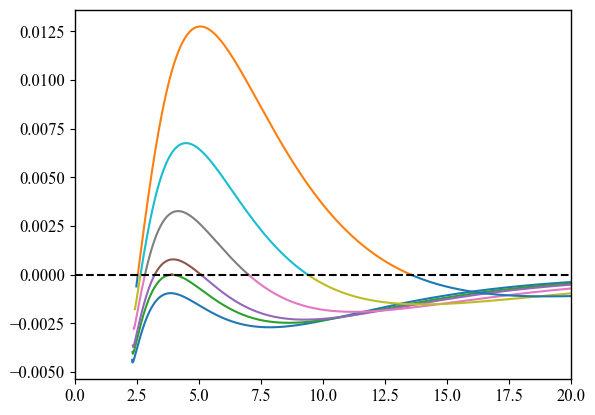

In [98]:
for m in m_list:
    plt.plot(K_us[m],np.where(A_s[m]<=0,A_s[m],np.nan))
    plt.plot(K_us[m],np.where(A_s[m]>0,A_s[m],np.nan))
plt.axhline(0,color='k',ls='--')

plt.xlim(0,20)
# plt.ylim(-0.0005,0.001)

In [ ]:
for K, r, r0, OP in zip(Ku_, F_Ru(Ku_), F_R0u(Ku_), F_OPS(Ku_)):
    # 1. 적당한 간격으로 샘플
    rps = np.r_[np.logspace(-10, -3, 100), np.linspace(0.001, (1 - r0) / 2, 100)]
    diffs = np.array([RP_diff(rp, K, r0, OP, m) for rp in rps])


    # 2. sign change 구간 찾기 (교점 후보)
    sign_change = np.where(np.diff(np.sign(diffs)) != 0)[0]

    try:
        # 첫 번째 교점
        i1 = sign_change[0]
        if len(sign_change) == 1:
            rp_left = 0
            RP1_d.append(0)
            RPl_d.append(0)
            
        else:
            rp_left = brentq(RP_diff, rps[i1], rps[i1+1], args=(K, r0, OP, m))
            RP1_d.append(rp_left)
            RPl_d.append(RP_l(rp_left, K, r0, OP, m))

        # 두 번째 교점
        i2 = sign_change[-1]
        rp_right = brentq(RP_diff, rps[i2-1], rps[i2+1], args=(K, r0, OP, m))


        RP1_u.append(rp_right)

        # RP값도 같이 저장

        RPl_u.append(RP_l(rp_right, K, r0, OP, m))
        K1p.append(K)
    except:
        K1p.append(K)
        RP1_d.append(np.nan)
        RP1_u.append(np.nan)
        RPl_d.append(np.nan)
        RPl_u.append(np.nan)


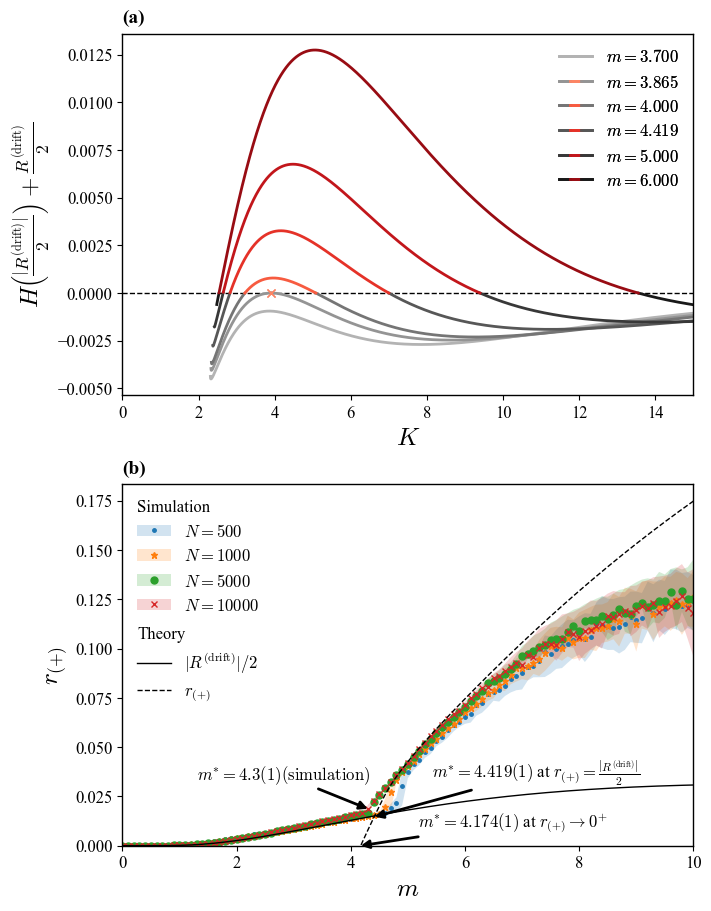

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

# --- 재사용 가능한 handler (위에서 쓰던 것) ---
class JoinedTripleHandler(HandlerTuple):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        y = height / 2.0
        n = len(orig_handle)
        seg_width = width / n
        artists = []
        for i, handle in enumerate(orig_handle):
            x0 = xdescent + i * seg_width
            x1 = xdescent + (i + 1) * seg_width
            line = plt.Line2D([x0, x1], [y, y],
                              color=handle.get_color(),
                              lw=handle.get_linewidth(),
                              ls=handle.get_linestyle())
            line.set_transform(trans)
            artists.append(line)
        return artists

# --- Figure + 2행 1열 서브플롯 (위: (a), 아래: (b)) ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 9), constrained_layout=True)

# -------------------- (a) 위쪽 패널 --------------------
lvals = np.linspace(0.3, 0.9, 6)
cs = plt.cm.gray_r(lvals)
cs_r = plt.cm.Reds(lvals)

leg_handles = []

for i in range(len(lvals)):
    m = m_list[i]
    K_ = K_us[m]
    A = A_s[m]
    # 두 구간을 각각 ax1에 그림
    h1, = ax1.plot(K_, np.where(A < 0, A, np.nan), c=cs[i], lw=2)
    if i == 1:
        h2, = ax1.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[i], lw=2,marker='x')
    else:
        h2, = ax1.plot(K_, np.where(A >= 0, A, np.nan), c=cs_r[i], lw=2)
    # A>0 구간이 있으면 triple, 없으면 double로 legend handle 구성
    if np.any(A > 0):
        leg_handles.append((h1, h2, h1))
    else:
        leg_handles.append((h1, h1))
    m_list.append(m)

# legend: handler_map으로 tuple을 JoinedTripleHandler로 처리
leg_a = ax1.legend(
    leg_handles,
    [f"$m={m:.3f}$" for m in m_list],
    handler_map={tuple: JoinedTripleHandler()},
    loc='upper right',
    frameon=False,
)
# 제목 왼쪽 정렬
ax1.set_xlim(0,15)
leg_a._legend_box.align = "left"
ax1.add_artist(leg_a)  # 명시적으로 추가

# ax1.set_ylabel(r'$r_{(+)}+\frac{R^{(\rm{drift})}}{2}$', fontsize=18)
ax1.set_ylabel(r'$H\left(\frac{\left|R^{(\rm{drift})}\right|}{2}\right) + \frac{R^{(\rm{drift})}}{2}$', fontsize=18)
ax1.set_xlabel(r'$K$', fontsize=18)
ax1.axhline(0, c='k', lw=1, zorder=-10, ls='--')

# (a) 라벨 텍스트 - 왼쪽 위에 붙여서 표시
ax1.text(0.0, 1.02, '(a)', transform=ax1.transAxes, fontsize=14, fontweight='bold',
         va='bottom', ha='left')

# -------------------- (b) 아래 패널 --------------------
labels = []
for DATA, N, marker in [(DATA500,500,'.'), (DATA1000,1000,'*'), (DATA5000,5000,'o'),(DATA10000,10000,'x')]:
    RP = DATA['N_RPs']
    RP_mean = np.nanmean(RP, axis=0)
    RP_1Q = np.percentile(RP, 25, axis=0)
    RP_3Q = np.percentile(RP, 75, axis=0)
    Rd = (R_0us - R_us) / 2

    l, = ax2.plot(DATA['ms'], RP_mean, marker, alpha=1, markersize=5)
    f = ax2.fill_between(DATA['ms'], RP_1Q, RP_3Q, alpha=0.2)
    labels.append((l, f))

# Simulation legend for ax2
leg1 = ax2.legend(labels, [r'$N=500$', r'$N=1000$', r'$N=5000$',r'$N=10000$'],
                  loc='upper left', frameon=False, title='Simulation')
leg1._legend_box.align = "left"

# Theory curves
line1, = ax2.plot(m_, Rd[:,700], color='k', lw=1, label=r'$|R^{(\mathrm{drift})}|/2$')
line2, = ax2.plot(m_, RP_us[:,700], color='k', ls='--', lw=1, label=r'$r_{(+)}$')

# Theory legend for ax2
leg2 = ax2.legend([line1, line2],
                  [r'$|R^{(\mathrm{drift})}|/2$', r'$r_{(+)}$'],
                  loc=6, frameon=False, title='Theory')
leg2._legend_box.align = "left"

# 동시에 두 legend를 표시
ax2.add_artist(leg1)

# 화살표/annotation들 (데이터 좌표 사용)
x0 = 4.3
y0 = np.nanmean(DATA10000['N_RPs'], axis=0)[43]   # RP_mean[44]에 대응
ax2.annotate(r'$m^{*} = 4.3(1) (\rm{simulation})$', xy=(x0, y0), xytext=(x0 - 3, y0 + 0.015),
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0))

x1 = 4.41885
y1 = RP_us[441, 700] 
ax2.annotate(r'$m^{*} = 4.419(1)$ at $r_{(+)} = \frac{\left|R^{(\rm{drift})}\right|}{2}$', xy=(x1, y1), xytext=(x1 + 1, y1 + 0.02),
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0), ha='left')

x0b = 4.17448
y0b = 0# RP_us[418, 700] 
ax2.annotate(r'$m^{*} = 4.174(1)$ at $r_{(+)} \rightarrow 0^{+}$', xy=(x0b, y0b), xytext=(x0b + 1, y0b + 0.01),
             arrowprops=dict(arrowstyle='-|>', lw=2, color='k', shrinkA=0, shrinkB=0))
# ax2.text(0.01,0.03,r'$K=7$',transform=ax2.transAxes,fontsize=18)
ax2.set_xlim(0, 10)
ax2.set_ylim(bottom=0)
ax2.set_xlabel(r'$m$', fontsize=18)
ax2.set_ylabel(r'$r_{(+)}$', fontsize=18)

# (b) 라벨
ax2.text(0.0, 1.02, '(b)', transform=ax2.transAxes, fontsize=14, fontweight='bold',
         va='bottom', ha='left')
plt.savefig('fig4 ver2.pdf', dpi=300)
plt.show()